# Aerial and segmented/original BGT viewer

In [1]:
import errno
from __future__ import print_function
import glob
from ipywidgets import interact
import ipywidgets as widgets

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import os
from skimage.io import imread

In [2]:
# Define data directory
data_dir = os.path.join('/Volumes','WD-PBrand','output')

try:
    os.listdir(data_dir)
    
    sample_dirs = sorted(next(os.walk(data_dir))[1])
    image = 'arial_image_*.tiff'
    bgt_labels = 'bgt_labels.tif'
    bgt_path = os.path.join('bgt', 'bgt.shp')
    bgt_data = os.path.join('bgt', 'bgt.dbf')
except OSError as e:
    print('Error: Data directory:',data_dir,'not found.')

In [3]:
# Custom labels and colormap
from matplotlib import colors
import matplotlib as mpl

labelmap = ['undefined',
            'pand',
            'greppel, droge sloot',
            'transitie',
            'waterloop',
            'watervlakte',
            'baan voor vliegverkeer',
            'fietspad',
            'inrit',
            'OV-baan',
            'overweg',
            'parkeervlak',
            'rijbaan autosnelweg',
            'rijbaan autoweg',
            'rijbaan lokale weg',
            'rijbaan regionale weg',
            'ruiterpad',
            'spoorbaan',
            'voetgangersgebied',
            'voetpad',
            'voetpad op trap',
            'woonerf',
            'zee'
           ]

cmap =  mpl.colors.ListedColormap([
    'xkcd:pale grey',
    'xkcd:reddish brown',
    'xkcd:powder blue',
    "xkcd:robin's egg",
    'xkcd:azure',
    'xkcd:medium blue',  
    'xkcd:silver',
    'xkcd:macaroni and cheese',
    'xkcd:light blue grey',
    'xkcd:dirty yellow',
    'xkcd:light grey',
    'xkcd:grape',
    'xkcd:ivory', # 1
    'xkcd:puke',
    'xkcd:light tan',
    'xkcd:buff',
    'xkcd:pumpkin',
    'xkcd:charcoal',
    'xkcd:dark sand',
    'xkcd:cement',
    'xkcd:mushroom',
    'xkcd:tan green',
    'xkcd:sea blue'
    ])

## Aerial image and segmented BGT viewer

<IPython.core.display.Javascript object>


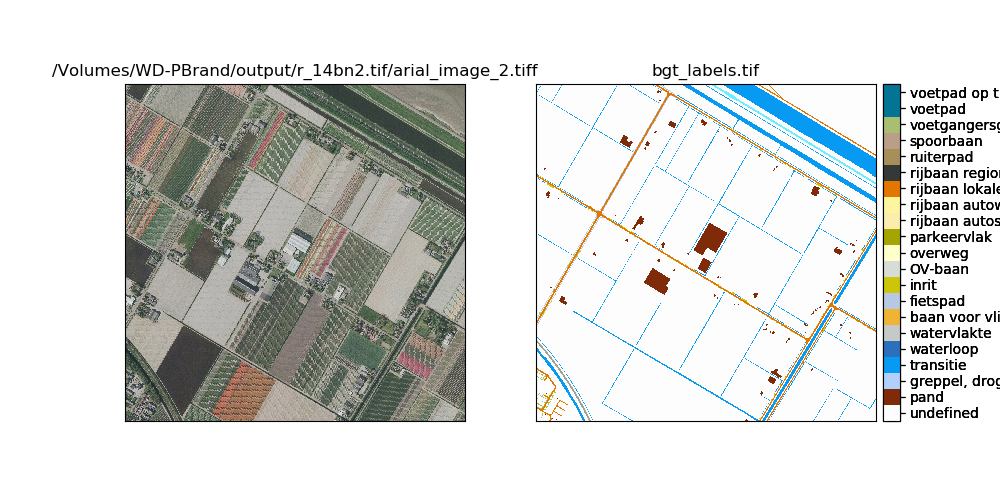

interactive(children=(Dropdown(description='Sample: ', layout=Layout(margin='0px 0px 0px 250px'), options=('r_09dz1.tif', 'r_10fz1.tif', 'r_10fz2.tif', 'r_10hn1.tif', 'r_10hn2.tif', 'r_10hz1.tif', 'r_10hz2.tif', 'r_11az1.tif', 'r_11az2.tif', 'r_11bz1.tif', 'r_11cn1.tif', 'r_11cn2.tif', 'r_11cz1.tif', 'r_11cz2.tif', 'r_11dn1.tif', 'r_11dz1.tif', 'r_14az2.tif', 'r_14bn1.tif', 'r_14bn2.tif', 'r_14bz1.tif', 'r_14bz2.tif', 'r_14cn2.tif', 'r_14cz2.tif', 'r_14dn1.tif', 'r_14dn2.tif', 'r_14dz1.tif', 'r_14dz2.tif', 'r_14en1.tif', 'r_14en2.tif', 'r_14ez1.tif', 'r_14ez2.tif', 'r_14fn1.tif', 'r_14fz1.tif', 'r_14gn1.tif', 'r_14gn2.tif', 'r_14gz1.tif', 'r_14gz2.tif', 'r_14hn1.tif', 'r_14hz1.tif', 'r_14hz2.tif', 'r_15cz1.tif', 'r_15cz2.tif', 'r_15fn1.tif', 'r_15fn2.tif', 'r_15fz1.tif', 'r_15fz2.tif', 'r_16an1.tif', 'r_16an2.tif', 'r_16az1.tif', 'r_16az2.tif', 'r_16bn1.tif', 'r_16bz1.tif', 'r_19an1.tif', 'r_19an2.tif', 'r_19az1.tif', 'r_19az2.tif', 'r_19bn1.tif', 'r_19bn2.tif', 'r_19bz1.tif', 'r_19bz2.tif', 'r_19cn1.tif', 'r_19cn2.tif', 'r_19cz1.tif', 'r_19cz2.tif', 'r_19dn1.tif', 'r_19dn2.tif', 'r_19dz1.tif', 'r_19dz2.tif', 'r_19en1.tif', 'r_19en2.tif', 'r_19ez1.tif', 'r_19ez2.tif', 'r_19fn1.tif', 'r_19fn2.tif', 'r_19fz1.tif', 'r_19fz2.tif', 'r_19gn1.tif', 'r_19gn2.tif', 'r_19gz1.tif', 'r_19gz2.tif', 'r_19hn1.tif', 'r_19hz1.tif', 'r_20an1.tif', 'r_20az1.tif', 'r_20dz2.tif', 'r_20gn1.tif', 'r_20gn2.tif', 'r_20gz1.tif', 'r_20gz2.tif', 'r_20hn1.tif', 'r_20hn2.tif', 'r_20hz1.tif', 'r_20hz2.tif', 'r_21cn1.tif', 'r_21cz1.tif', 'r_25bn1.tif', 'r_25bn2.tif', 'r_25bz1.tif', 'r_25bz2.tif', 'r_25dn1.tif', 'r_25dn2.tif', 'r_25dz1.tif', 'r_25dz2.tif', 'r_25en1.tif', 'r_25en2.tif', 'r_25ez1.tif', 'r_25ez2.tif', 'r_25gn1.tif', 'r_25gn2.tif', 'r_25gz2.tif', 'r_26az1.tif', 'r_26az2.tif', 'r_26bn1.tif', 'r_26bn2.tif', 'r_26bz1.tif', 'r_26bz2.tif', 'r_26cn1.tif', 'r_26cn2.tif', 'r_26dn1.tif', 'r_26dn2.tif', 'r_26dz1.tif', 'r_26dz2.tif', 'r_26en1.tif', 'r_26en2.tif', 'r_26ez1.tif', 'r_26ez2.tif', 'r_26fn1.tif', 'r_26fn2.tif', 'r_26fz1.tif', 'r_26gn1.tif', 'r_26gz1.tif', 'r_27an1.tif', 'r_30gz1.tif', 'r_30gz2.tif', 'r_30hz1.tif', 'r_30hz2.tif', 'r_31gn1.tif', 'r_31gn2.tif', 'r_31gz1.tif', 'r_31gz2.tif', 'r_31hn1.tif', 'r_31hn2.tif', 'r_31hz1.tif', 'r_31hz2.tif', 'r_32cn1.tif', 'r_32cz1.tif', 'r_37ez1.tif', 'r_37fn2.tif', 'r_37fz1.tif', 'r_37fz2.tif', 'r_37gn1.tif', 'r_37gn2.tif', 'r_37hn1.tif', 'r_37hn2.tif', 'r_38en1.tif', 'r_38en2.tif', 'r_38ez1.tif', 'r_38ez2.tif', 'r_38fn1.tif', 'r_38fn2.tif', 'r_38fz1.tif', 'r_38fz2.tif', 'r_39an1.tif', 'r_39az1.tif'), value='r_09dz1.tif'), Output()), _dom_classes=('widget-interact',))

In [4]:
plt.close("all")
%matplotlib notebook
fig = plt.figure(figsize=(10, 5))
grid = gridspec.GridSpec(1, 2, figure=fig, width_ratios=[1,1.07])

# Aerial Image
ax1 = fig.add_subplot(grid[0, 0])
ax1.get_xaxis().set_ticks([])
ax1.get_yaxis().set_ticks([])

# BGT Labels Image
ax2 = fig.add_subplot(grid[0, 1], sharex=ax1, sharey=ax1)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])

#grid.tight_layout(fig)
sample_selector = widgets.Dropdown(
                    options=sample_dirs,
                    value=sample_dirs[0],
                    description='Sample: ',
                    disabled=False,
                    layout=widgets.Layout(margin = '0px 0px 0px 250px'))

bounds=np.arange(0,22)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

@interact(sample=sample_selector)
def show_image(sample):
    # Aerial Image
    current_dir = os.path.join(data_dir,sample)
    image = glob.glob(str(current_dir)+os.sep+'*rial_*.tiff')[0]
    if os.path.exists(image):
        img = imread(image)
        ax1.imshow(img[:,:,0:3])#, cmap='gray')
        ax1.set_title(image)
    
    # BGT Labels Image
    labels = imread(os.path.join(data_dir,sample, bgt_labels)).astype(np.uint8)
    ims = ax2.imshow(labels, cmap=cmap)
    ax2.set_title(bgt_labels)
    
    # Colorbar
    divider = make_axes_locatable(ax2)
    cbar_ax = divider.append_axes("right", "5%", pad="2%")
    cbar = fig.colorbar(ims, cax=cbar_ax,  cmap=cmap, norm=norm, 
                        boundaries=[-10] + bounds + [10], ticks=bounds +0.5,
                        spacing='uniform')
    cbar.ax.set_yticklabels(labelmap)
    #grid.tight_layout(fig)
    plt.show()

In [ ]:
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(os.path.join('/Volumes','WD-PBrand','example2'))

#extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig(os.path.join('/Volumes','WD-PBrand','bgt1'), bbox_inches=extent.expanded(2.0 , 1.0))

In [ ]:
print(extent)

## BGT Shape file loader

In [ ]:
import geopandas as gp
shape_path = os.path.join(data_dir, sample_dirs[0],bgt_path)
patch = gp.GeoDataFrame.from_file(shape_path)
patch.head()

In [ ]:
plt.close("all")
import geopandas as gp
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,18)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

from __future__ import print_function
from ipywidgets import interact
import ipywidgets as widgets

def plot_bgt(patch_nr):
    shape_path = os.path.join(data_dir, sample_dirs[patch_nr],bgt_path)
    patch = gp.GeoDataFrame.from_file(shape_path)
    patch.plot(column='category', cmap=cmap)
    plt.axis('off')

interact(plot_bgt, patch_nr=widgets.IntSlider(min=0,max=len(sample_dirs),step=1,value=0), continuous_update=False);